In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
col = {
    'skin': 'Skin', 'test': 'Test', 'mass': 'Mass', 'pedi': 'Pedi', 'age': 'Age', 'class': 'Classes'
}

df = df.rename(columns = col)

df.head(3)

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Classes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df.nunique()

Preg        17
Plas       136
Pres        47
Skin        51
Test       186
Mass       248
Pedi       517
Age         52
Classes      2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   Plas     768 non-null    int64  
 2   Pres     768 non-null    int64  
 3   Skin     768 non-null    int64  
 4   Test     768 non-null    int64  
 5   Mass     768 non-null    float64
 6   Pedi     768 non-null    float64
 7   Age      768 non-null    int64  
 8   Classes  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Preg       0
Plas       0
Pres       0
Skin       0
Test       0
Mass       0
Pedi       0
Age        0
Classes    0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 42)

In [9]:
df.dtypes

Preg         int64
Plas         int64
Pres         int64
Skin         int64
Test         int64
Mass       float64
Pedi       float64
Age          int64
Classes      int64
dtype: object

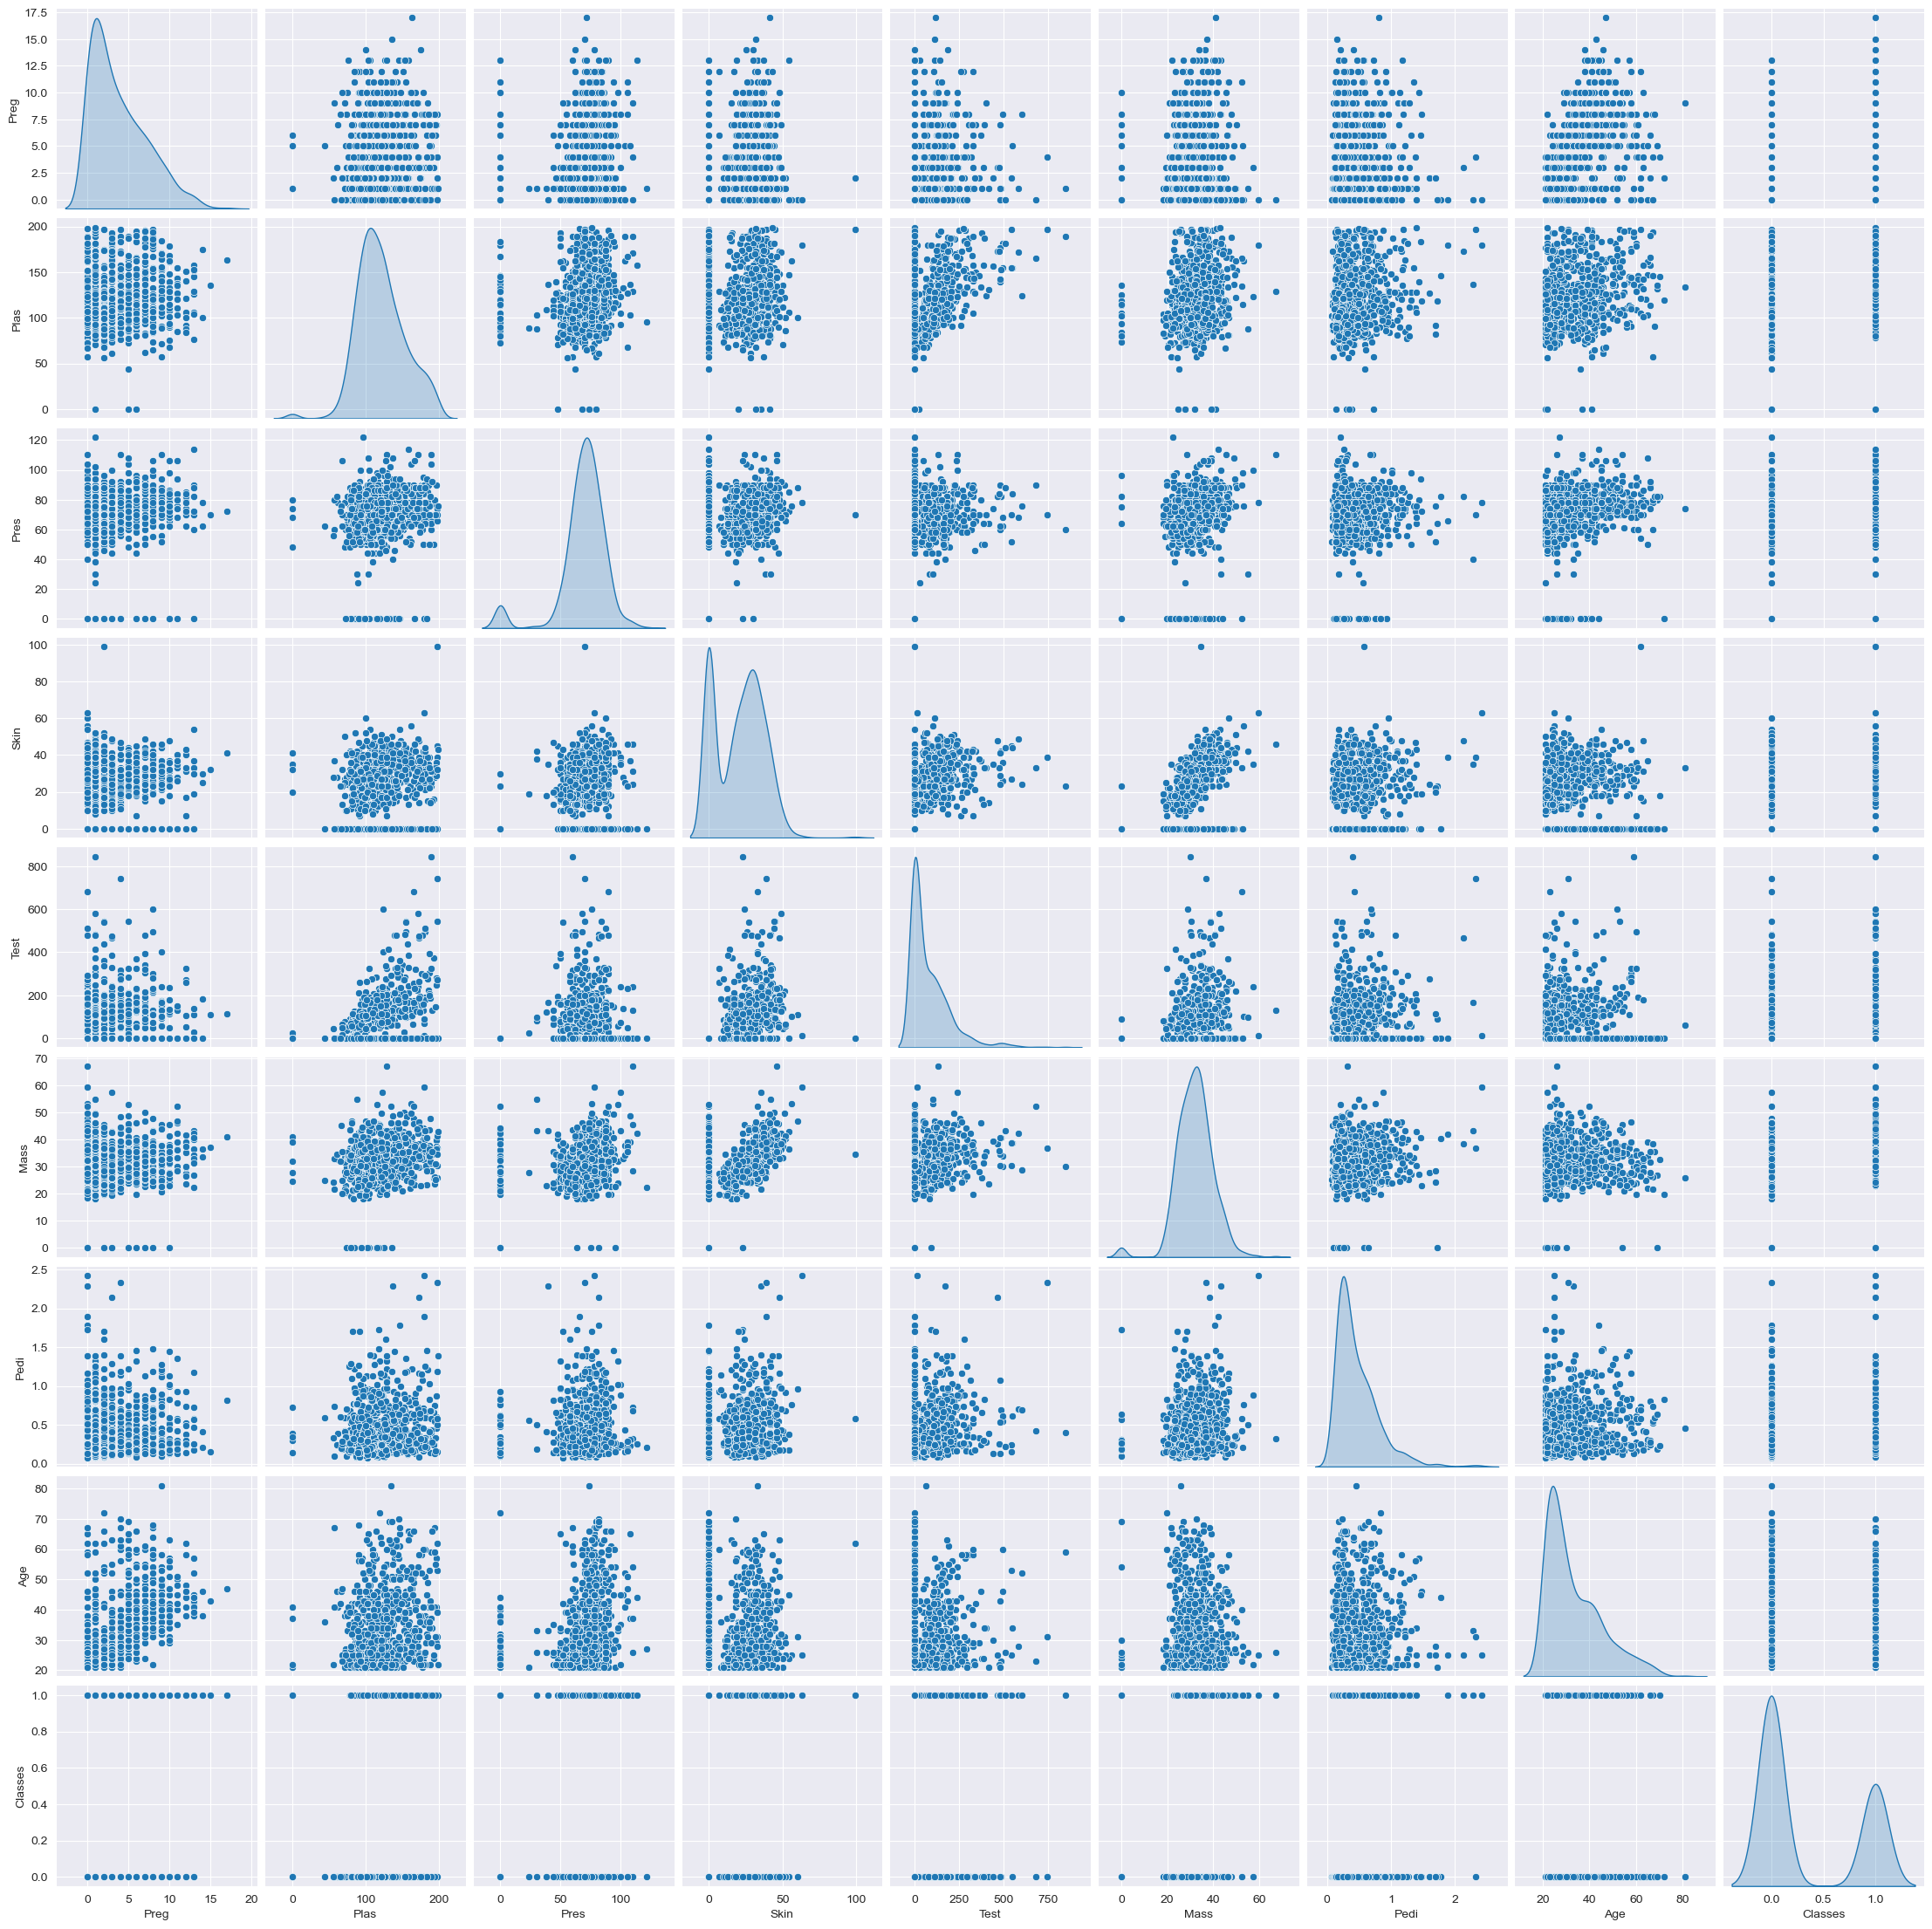

In [10]:
%matplotlib inline

sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
modelGusNB = GaussianNB()
modelGusNB.fit(xTrain, yTrain)
modelGusNB

,priors,None
,var_smoothing,1e-09


## There's no cleaning or anything, it's just straight up to the native GNB.

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



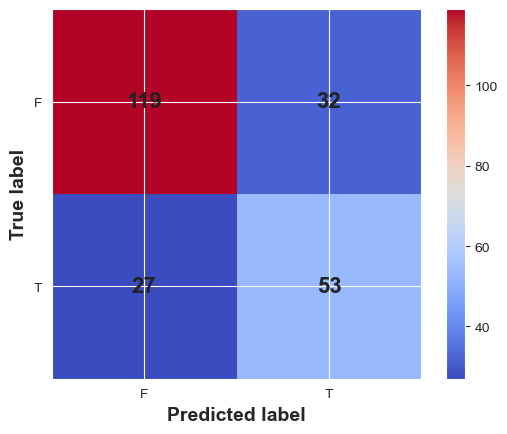

In [12]:
pred = modelGusNB.predict(xTest)

print(metrics.classification_report(yTest, pred))

disp = ConfusionMatrixDisplay.from_predictions(yTest, pred, display_labels=['F', 'T'], cmap='coolwarm')

for text in disp.text_.ravel():
    text.set_fontsize(16)
    text.set_weight('bold')
    text.set_color('#222222')

disp.ax_.set_xlabel('Predicted label', fontsize=14, weight='bold')
disp.ax_.set_ylabel('True label', fontsize=14, weight='bold')

plt.show()